# K Nearest Neighbors Project 


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [ ]:
df = pd.read_csv('KNN_Project_Data')

In [ ]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA



In [ ]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(df_feat,df['TARGET CLASS'],
                                                    test_size=0.33)

In [ ]:
y_test.shape

(330,)

# Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

In [ ]:
pred=knn.predict(y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[122  44]
 [ 41 123]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       166
           1       0.74      0.75      0.74       164

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



# Choosing a K Value

In [ ]:
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,X_test)
  pred_i=knn.predict(y_train)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

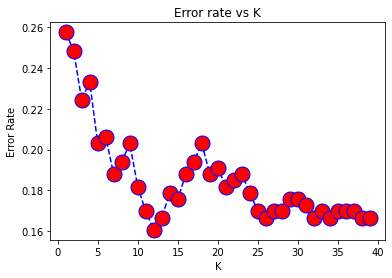

In [ ]:
#plt.figure(fig_size=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=15)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [ ]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,X_test)
pred1=knn.predict(y_train)
print('With K=12')
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

With K=12
[[140  26]
 [ 27 137]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       166
           1       0.84      0.84      0.84       164

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

